# Stochastic Oscillation

## Importing Data
### Stock: NVDA \ Period: 1Y, Interval: 1D

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

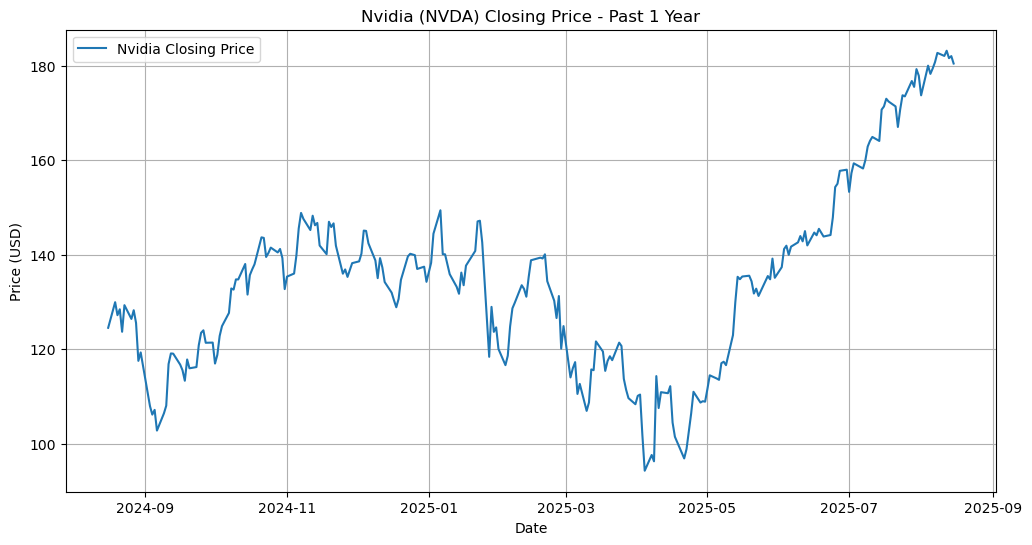

In [8]:
nvda = yf.Ticker("NVDA")

data = nvda.history(period = "1y", interval = "1d")

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Nvidia Closing Price')
plt.title('Nvidia (NVDA) Closing Price - Past 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Strategy Implementation
### The Stochastic Oscillator (SO) measures where a stock’s current closing price sits within its recent high-low range, signaling potential overbought or oversold conditions.

In [8]:
# for reference
print(data.head(3))

                                 Open        High         Low       Close  \
Date                                                                        
2024-08-16 00:00:00-04:00  121.901491  124.960523  121.141729  124.540657   
2024-08-19 00:00:00-04:00  124.240744  129.958939  123.381015  129.958939   
2024-08-20 00:00:00-04:00  128.359439  129.838983  125.850237  127.209808   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-08-16 00:00:00-04:00  302589900        0.0           0.0  
2024-08-19 00:00:00-04:00  318333600        0.0           0.0  
2024-08-20 00:00:00-04:00  300087400        0.0           0.0  


### Short-term MA = 10D, Long-term MA = 30D

Total Revenue from Stochastic Oscillator strategy with volume 100: $7812.69


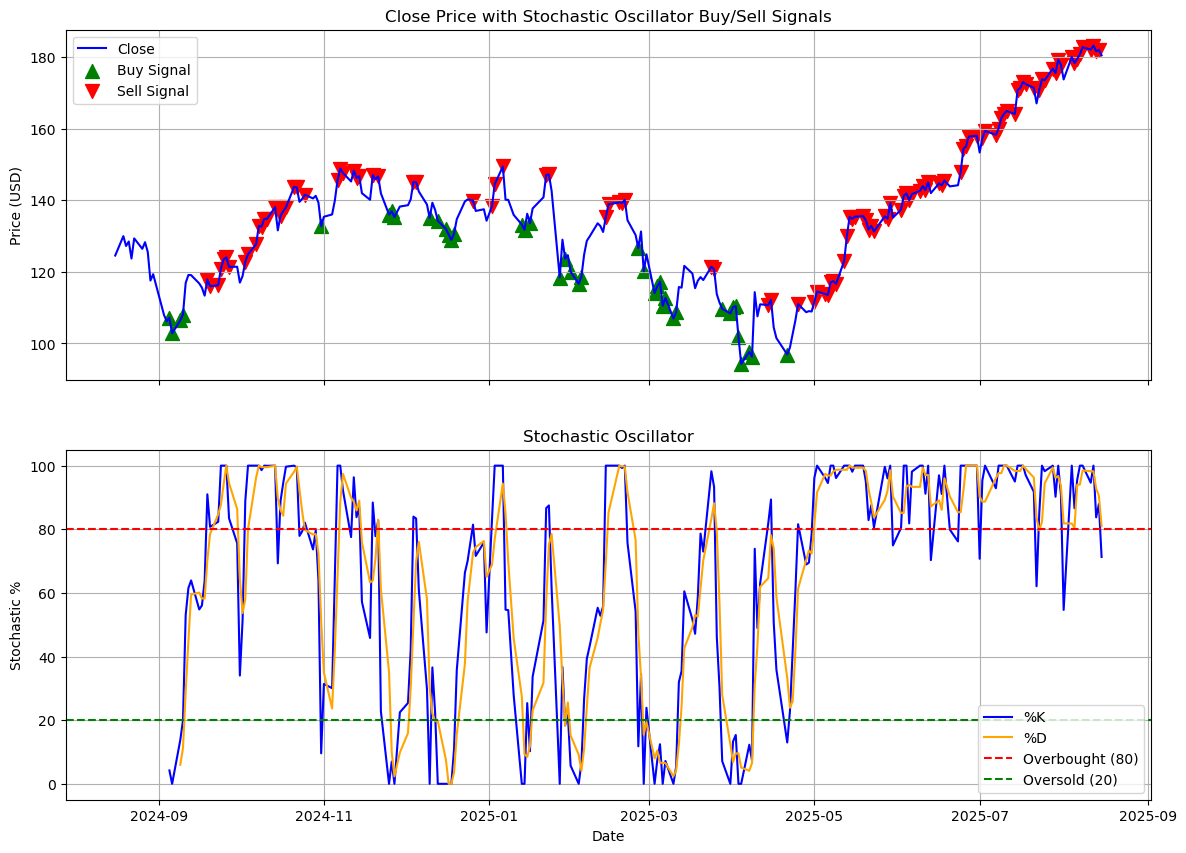

In [14]:
# --- Calculate Stochastic Oscillator ---
n = 14  # lookback period for SO
data['Low_n'] = data['Close'].rolling(window=n).min()
data['High_n'] = data['Close'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_n']) / (data['High_n'] - data['Low_n'])
data['%D'] = data['%K'].rolling(window=3).mean()  # 3-day SMA of %K

# --- Generate SO-based signals ---
data['Signal_SO'] = 0
data.loc[data['%K'] < 20, 'Signal_SO'] = 1    # Buy when oversold
data.loc[data['%K'] > 80, 'Signal_SO'] = -1   # Sell when overbought

# --- Calculate revenue ---
position = 0
buy_price = 0
revenue = 0
volume = 100

for i in range(len(data)):
    signal = data['Signal_SO'].iloc[i]
    price = data['Close'].iloc[i]
    
    if signal == 1 and position == 0:  # Buy
        buy_price = price
        position = 1
    elif signal == -1 and position == 1:  # Sell
        trade_revenue = (price - buy_price) * volume
        revenue += trade_revenue
        position = 0

# Close any open position at the end
if position == 1:
    trade_revenue = (data['Close'].iloc[-1] - buy_price) * volume
    revenue += trade_revenue

print(f"Total Revenue from Stochastic Oscillator strategy with volume {volume}: ${revenue:.2f}")

# --- Plot Close price + SO signals + oscillator ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10), sharex=True)

# Top: Close price with buy/sell
ax1.plot(data.index, data['Close'], label='Close', color='blue')
ax1.scatter(data.index[data['Signal_SO']==1], data['Close'][data['Signal_SO']==1],
            marker='^', color='green', s=100, label='Buy Signal')
ax1.scatter(data.index[data['Signal_SO']==-1], data['Close'][data['Signal_SO']==-1],
            marker='v', color='red', s=100, label='Sell Signal')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Close Price with Stochastic Oscillator Buy/Sell Signals')
ax1.legend()
ax1.grid(True)

# Bottom: %K and %D lines with overbought/oversold zones
ax2.plot(data.index, data['%K'], label='%K', color='blue')
ax2.plot(data.index, data['%D'], label='%D', color='orange')
ax2.axhline(80, color='red', linestyle='--', label='Overbought (80)')
ax2.axhline(20, color='green', linestyle='--', label='Oversold (20)')
ax2.set_ylabel('Stochastic %')
ax2.set_xlabel('Date')
ax2.set_title('Stochastic Oscillator')
ax2.legend()
ax2.grid(True)

plt.show()

Total Revenue from Stochastic Oscillator strategy with volume 100: $7812.69


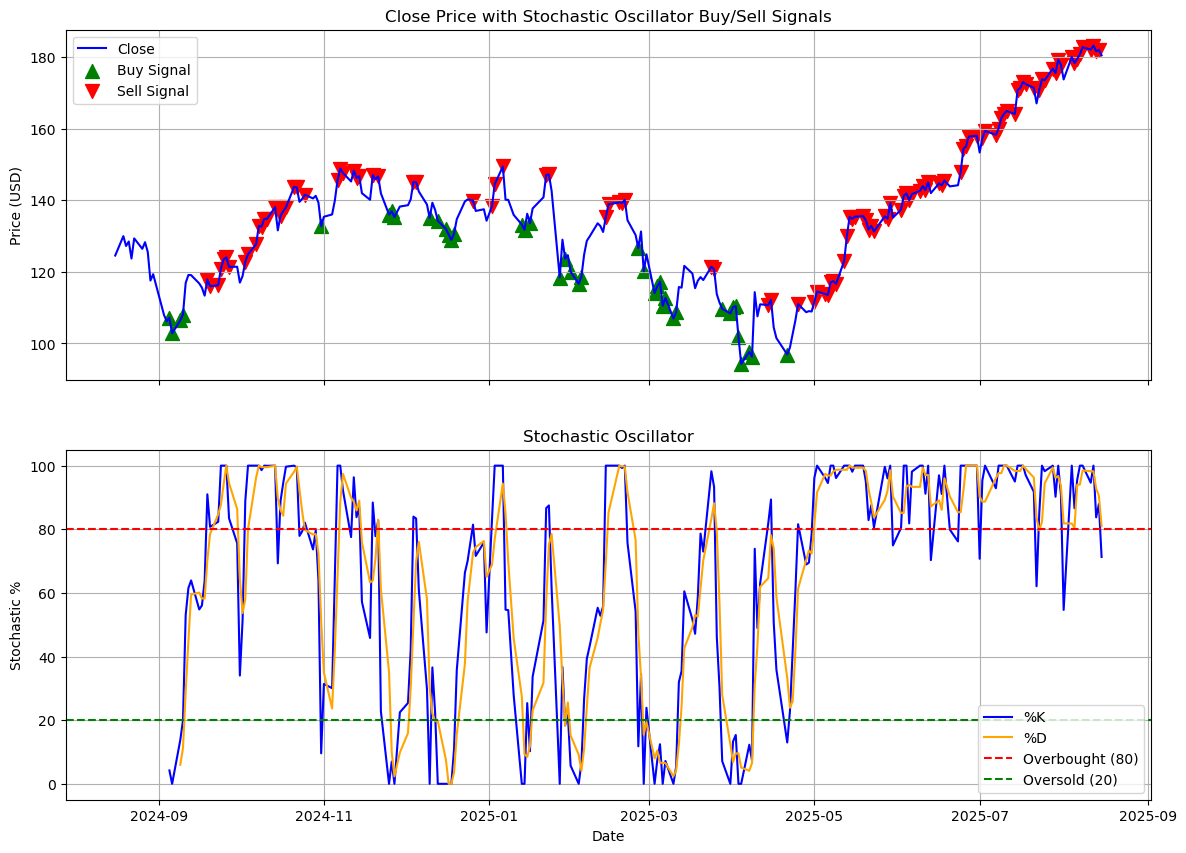

In [12]:
# --- Calculate Stochastic Oscillator ---
n = 14  # lookback period for SO
data['Low_n'] = data['Close'].rolling(window=n).min()
data['High_n'] = data['Close'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_n']) / (data['High_n'] - data['Low_n'])
data['%D'] = data['%K'].rolling(window=3).mean()  # 3-day SMA of %K

# --- Generate SO-based signals ---
data['Signal_SO'] = 0
data.loc[data['%K'] < 20, 'Signal_SO'] = 1    # Buy when oversold
data.loc[data['%K'] > 80, 'Signal_SO'] = -1   # Sell when overbought

# --- Calculate revenue ---
position = 0
buy_price = 0
revenue = 0
volume = 100

for i in range(len(data)):
    signal = data['Signal_SO'].iloc[i]
    price = data['Close'].iloc[i]
    
    if signal == 1 and position == 0:  # Buy
        buy_price = price
        position = 1
    elif signal == -1 and position == 1:  # Sell
        trade_revenue = (price - buy_price) * volume
        revenue += trade_revenue
        position = 0

# Close any open position at the end
if position == 1:
    trade_revenue = (data['Close'].iloc[-1] - buy_price) * volume
    revenue += trade_revenue

print(f"Total Revenue from Stochastic Oscillator strategy with volume {volume}: ${revenue:.2f}")

# --- Plot Close price + SO signals + oscillator ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10), sharex=True)

# Top: Close price with buy/sell
ax1.plot(data.index, data['Close'], label='Close', color='blue')
ax1.scatter(data.index[data['Signal_SO']==1], data['Close'][data['Signal_SO']==1],
            marker='^', color='green', s=100, label='Buy Signal')
ax1.scatter(data.index[data['Signal_SO']==-1], data['Close'][data['Signal_SO']==-1],
            marker='v', color='red', s=100, label='Sell Signal')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Close Price with Stochastic Oscillator Buy/Sell Signals')
ax1.legend()
ax1.grid(True)

# Bottom: %K and %D lines with overbought/oversold zones
ax2.plot(data.index, data['%K'], label='%K', color='blue')
ax2.plot(data.index, data['%D'], label='%D', color='orange')
ax2.axhline(80, color='red', linestyle='--', label='Overbought (80)')
ax2.axhline(20, color='green', linestyle='--', label='Oversold (20)')
ax2.set_ylabel('Stochastic %')
ax2.set_xlabel('Date')
ax2.set_title('Stochastic Oscillator')
ax2.legend()
ax2.grid(True)

plt.show()